In [31]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from datetime import datetime

In [33]:
data = pd.read_csv("..\data\WHO-COVID-19-global-daily-data.csv")

In [34]:
#Initial Inspection

print(f"Rows: {data.shape[0]}, Columns: {data.shape[1]}")
print("\n", data.head())
print("\n", data.dtypes)
print("\n", data.isnull().sum())

Rows: 477600, Columns: 8

   Date_reported Country_code                           Country WHO_region  \
0    2020-01-04           VC  Saint Vincent and the Grenadines        AMR   
1    2020-01-04           SN                           Senegal        AFR   
2    2020-01-04           SB                   Solomon Islands        WPR   
3    2020-01-04           LK                         Sri Lanka       SEAR   
4    2020-01-04           SY              Syrian Arab Republic        EMR   

   New_cases  Cumulative_cases  New_deaths  Cumulative_deaths  
0        NaN                 0         NaN                  0  
1        NaN                 0         NaN                  0  
2        0.0                 0         0.0                  0  
3        0.0                 0         0.0                  0  
4        NaN                 0         NaN                  0  

 Date_reported         object
Country_code          object
Country               object
WHO_region            object
New_case

In [36]:
#Standardizing Columns Names
data.columns = data.columns.str.lower().str.replace('[^a-z0-9]', '_', regex = True)
print("Columns renamed to:", data.columns.tolist())

Columns renamed to: ['date_reported', 'country_code', 'country', 'who_region', 'new_cases', 'cumulative_cases', 'new_deaths', 'cumulative_deaths']


In [39]:
#Handling Missing Data
#for cumulative_counts, forward fill method (ffill)
cols_to_ffill = ['cumulative_cases', 'cumulative_deaths']
data[cols_to_ffill] = data[cols_to_ffill].fillna(method='ffill')

In [41]:
#for daily counts, fill with 0 (assuming no cases/deaths if not reported)
cols_to_zero = ['new_cases', 'new_deaths']
data[cols_to_zero] = data[cols_to_zero].fillna(0)

In [43]:
#after handling missing data
print(data.isnull().sum())

date_reported           0
country_code         1990
country                 0
who_region              0
new_cases               0
cumulative_cases        0
new_deaths              0
cumulative_deaths       0
dtype: int64


In [45]:
#Fix Data Quality Issues
# A. handle -ve values
data['new_cases'] = data['new_cases'].abs()
data['new_deaths'] = data['new_deaths'].abs

In [47]:
# B. standardize country names
country_mapping = {
    'US': 'United States of America',
    'USA': 'United States of America',
    'UK': 'United Kingdom',
    'Korea, South': 'South Korean'
}
data['country'] = data['country'].replace(country_mapping)

In [49]:
# C. remove duplicate rows (same data + country)
duplicates_before = data.duplicated(subset=['date_reported', 'country']).sum()
data = data.drop_duplicates(subset=['date_reported', 'country'], keep='first')
duplicates_after = data.duplicated(subset=['date_reported', 'country']).sum()
print(f"\nRemoved {duplicates_before - duplicates_after} duplicate rows")


Removed 0 duplicate rows


In [51]:
#Validate & Compare
print(pd.DataFrame({
    'Before Cleaning': data['new_cases'].describe(),
    'After Cleaning': data['new_deaths'].describe()
}))

        Before Cleaning                                     After Cleaning
25%        0.000000e+00                                                NaN
50%        0.000000e+00                                                NaN
75%        3.100000e+01                                                NaN
count      4.776000e+05                                             477600
freq                NaN                                             477600
max        6.966046e+06                                                NaN
mean       1.629825e+03                                                NaN
min        0.000000e+00                                                NaN
std        3.228088e+04                                                NaN
top                 NaN  <bound method NDFrame.abs of 0         0.0\n1 ...
unique              NaN                                                  1


In [82]:
#Visual Comparison
plt.figure(figsize=(12,6))

<Figure size 1200x600 with 0 Axes>

<Figure size 1200x600 with 0 Axes>

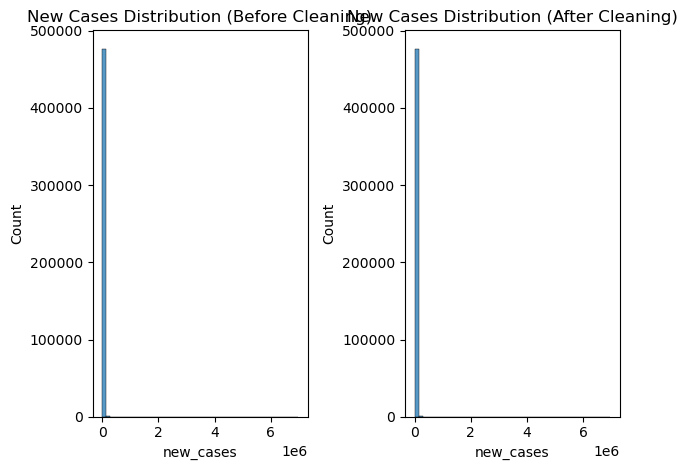

In [84]:
#Before Cleaning (using original data)
plt.subplot(1, 2, 1)
sns.histplot(data=data, x='new_cases', bins=50)
plt.title('New Cases Distribution (Before Cleaning)')
#After Cleaning
plt.subplot(1, 2, 2)
sns.histplot(data=data, x='new_cases', bins=50)
plt.title('New Cases Distribution (After Cleaning)')
plt.tight_layout()
plt.savefig("..\plots\cleaning_comparison.png")

In [85]:
data.to_csv('..\data\cleaned_covid_data.csv', index=False)

In [86]:
#Report generation
print("\n=== CLEANING REPORT ===")
print(f"Original records: {data.shape[0]}")
print(f"Columns cleaned: {len(data.columns)}")
print(f"Duplicates removed: {duplicates_before - duplicates_after}")
print("\nTop 5 Countries by Total Cases:")
print(data.groupby('country')['new_cases'].sum().sort_values(ascending=False).head(5))


=== CLEANING REPORT ===
Original records: 477600
Columns cleaned: 8
Duplicates removed: 0

Top 5 Countries by Total Cases:
country
United States of America    103436829.0
China                        99381761.0
India                        45056193.0
France                       39040627.0
Germany                      38437865.0
Name: new_cases, dtype: float64
